# Homework Assignment 4

## Using the Perceptron, SVMs, and PCA with sonar data

### <p style="text-align: right;"> &#9989; Brayden Dillon</p>
### <p style="text-align: right;"> &#9989; BraydenDillon</p>

<img src="https://images.squarespace-cdn.com/content/v1/5497331ae4b0148a6141bd47/1533488464157-AYYS0QO7ZW0KPGOT6XRQ/underwater-sea-mine-danger-weapon-deadly-naval-ocean-sea_bpocqo-8__F0000.png?format=1500w" width=400px align="right" style="margin-left: 20px" alt="Underwater naval mines">

### Goals for this homework assignment

By the end of this assignment, you should be able to:
* Use `git` and the branching functionality to track your work and turn in your assignment
* Read in data and prepare it for modeling
* Build, fit, and evaluate an SVC model of data
* Use PCA to reduce the number of important features
* Build, fit, and evaluate an SVC model of PCA-transformed data
* Systematically investigate the effects of the number of PCA components on an SVC model of data

### Assignment instructions:

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **59 points** possible on this assignment. Point values for each part are included in the section headers.

This assignment is **due by 11:59 pm on Friday, December 1. It should be pushed to your repo (see Part 1) AND submitted to D2L**. 

#### Imports

It's useful to put all of the imports you need for this assignment in one place. Read through the assignment to figure out which imports you'll need or add them here as you go.

In [1]:
# Put all necessary imports here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

---
## Part 1: Git Repo Management and Branching (6 points)

For this assignment, you're going to add it to the `cmse202-f23-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f23-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw04_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

```bash
# Git clone
```

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f23-turnin`" repository inside the `hw-04` directory that you just created within the new branch `hw04_branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.


---
<a id="loading"></a>
## 2. Loading a the dataset: Sonar data measurements (7 points)

You may or may not have had a chance to experiment with the sonar dataset provided in the Day 19 ICA extension assignment, but it's another common dataset used for testing out **binary classifiers**.

Since the goal for this assignment is to practice using the Perceptron classifier, SVMs, and PCA tools we've covered in class, we'll going to use this relatively simple dataset and avoid any complicated data wrangling headaches!
 
#### The data

The sonar dataset is pretty straight forward, but you'll need to download the data and give yourself some time to get familiar with it.

**&#9989; Do This:**  To get started, **you'll need to download the following file**:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/sonar.csv`

Once you've downloaded the data, **open the files using a text browser or other tool on your computer and take a look at the data to get a sense for the information it contains.** Make sure you take a moment to read the [UC Irvine Machine Learning Repository page](http://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks) to understand exactly what is in this dataset, but essentially is a collection of sonar measurements of rocks and "mines" (metal cynlinders). 

In [2]:
!curl -O 'https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/sonar.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 87486  100 87486    0     0   805k      0 --:--:-- --:--:-- --:--:--  805k


**&#9989; Question 2.0 (2 points):** In your own words, what is the information contains in the sonar dataset? What does each column represent? What are the current labels in the dataset? Are they numeric or string format? What are the possible values for the labels?

<font size=+3>&#9998;</font> The information contained in the dataset is a large table of attributes. Each column represents one label-less attribute aside from the classes, and the data is in numeric form, specifically floats, again aside from the class column, which is a string. I have no inkling of what the correct labels for all of the columns are. 

### 2.1 Load the data

**&#9989; Task 2.1 (1 point):** Read the ```sonar.csv``` file into your notebook. Perhaps unsurprisingly, we're going to use "Class" column as the classes that we'll be trying to predict with our classification model.

Once you've loaded in the data, **display the DataFrame to make sure it looks reasonable**. You should have **61 columns** and **208 rows**.

In [3]:
# Put your code here
sonar_df = pd.read_csv('sonar.csv')
sonar_df

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


### 2.2 Relabeling the classes

To simplify the process of modeling the sonar data, we should convert the class labels from strings to integers. For example, rather than `Rock`, we can consider this to be class "`1`".

**&#9989; Task 2.2 (2 points):** Replace all of the strings in your "Class" column with integers based on the following:

| original label | replaced label |
| -------- | -------- |
| Rock | 1 |
| Mine | 0 |

Once you've replaced the labels, display your DataFrame and confirm that it looks correct.

In [4]:
sonar_df

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


In [5]:
# Put your code here
#data['class'][data['class'] == 2] = 0
#data['class'][data['class'] == 4] = 1
#data
sonar_df['Class'][sonar_df['Class']=='Rock'] = 1
sonar_df['Class'][sonar_df['Class'] == 'Mine'] = 0
sonar_df
sonar_df['Class'] = sonar_df['Class'].astype(int)
sonar_df['Class'].dtypes

/tmp/ipykernel_3086013/3988436939.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonar_df['Class'][sonar_df['Class']=='Rock'] = 1
/tmp/ipykernel_3086013/3988436939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonar_df['Class'][sonar_df['Class'] == 'Mine'] = 0


dtype('int64')

### 2.3 Separating the "features" from the "labels"

As we've seen when working with `sklearn` it can be much easier to work with the data if we have separate variables that store the features and the labels.

**&#9989; Task 2.3 (1 point):** Split your DataFrame so that you have two separate DataFrames, one called `features`, which contains all of the sonar features, and one called `labels`, which contains all of the *new* sonar integer labels you just created. **Display both of these new DataFrames to make sure they look correct.**

In [6]:
# Put your code here
features = sonar_df.drop(columns = 'Class')
labels = sonar_df['Class']
rocks = 0
mines = 0
for i in labels:
    if i == 1:
        rocks += 1
    else:
        mines += 1
print('rocks: '+str(rocks))
print('mines: '+str(mines))

rocks: 97
mines: 111


In [7]:
labels.dropna()
labels.shape, features.shape

((208,), (208, 60))

In [8]:
features, labels

(     attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
 0         0.0200       0.0371       0.0428       0.0207       0.0954   
 1         0.0453       0.0523       0.0843       0.0689       0.1183   
 2         0.0262       0.0582       0.1099       0.1083       0.0974   
 3         0.0100       0.0171       0.0623       0.0205       0.0205   
 4         0.0762       0.0666       0.0481       0.0394       0.0590   
 ..           ...          ...          ...          ...          ...   
 203       0.0187       0.0346       0.0168       0.0177       0.0393   
 204       0.0323       0.0101       0.0298       0.0564       0.0760   
 205       0.0522       0.0437       0.0180       0.0292       0.0351   
 206       0.0303       0.0353       0.0490       0.0608       0.0167   
 207       0.0260       0.0363       0.0136       0.0272       0.0214   
 
      attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  ...  \
 0         0.0986       0.1539       0.1601

&#9989; **Question 2.1 (1 point):** How balanced is your set of sonar classes? Does it matter for the set of classes to be balanced? Why or why not? (You might need to write a bit of code to figure out how balanced your set of sonar classes is.)

<font size=+3>&#9998;</font> It seems that there is a similar number of rocks and mines in the dataset, there are more mines overall but they both hover around 100

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 2", and push the changes to GitHub.

---

---
## 3. Building an SVC model (4 points)

Now, to tackle this classification problem, we will use a support vector machine just like we've done previously (e.g. in the **Day 20 and Day 21 assignments**). Of course, we could easily replace this with any `sklearn` classifier we choose, but for now we will just use an SVC with a linear kernel.

### 3.1 Splitting the data

But first, we need to split our data into training and testing data!

**&#9989; Task 3.1 (1 point):** Split your data into a training and testing set with a training set representing 75% of your data. For reproducibility , set the `random_state` argument to `8675309`. Print the lengths to show you have the right number of entries.

In [9]:
# Put your code here
train_vectors, test_vectors, train_labels, test_labels = train_test_split(features,
                                                                          labels,
                                                                          test_size = .25, 
                                                                          train_size = .75, 
                                                                          random_state=8675309)
train_labels

73     1
79     1
29     1
77     1
71     1
      ..
49     1
64     1
148    0
140    0
1      1
Name: Class, Length: 156, dtype: int64

### 3.2 Modeling the data and evaluating the fit

As you have done this a number of times at this point, we ask you to do most of the analysis for this problem in one cell.

**&#9989; Task 3.2 (2 points):** Build a **linear** kernel SVC model with `C=1.0`, fit it to the training set, and use the test features to predict the outcomes. Evaluate the fit using the **confusion matrix** and **classification report**.

**First Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

**Second Note:** You should not be performing a "grid search" for this model. We're just trying to get a baseline for how well the model performs, but fitting a single SVC model using the `SVC` class from sklearn.

In [10]:
np.unique(train_labels)

array([0, 1])

In [11]:
# Put your code here
svc_classifier = svm.SVC(kernel = 'linear', C=1.0)

result = svc_classifier.fit(train_vectors, train_labels)

predictions = result.predict(test_vectors)
accuracy = result.score(test_vectors, test_labels)
print(accuracy)
print(classification_report(predictions, test_labels))
print(confusion_matrix(test_labels, predictions))

0.8076923076923077
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.75      0.82      0.78        22

    accuracy                           0.81        52
   macro avg       0.80      0.81      0.81        52
weighted avg       0.81      0.81      0.81        52

[[24  4]
 [ 6 18]]


&#9989; **Question 3.1 (1 point):** How accurate is your model? What evidence are you using to determine that? How many false positives and false negatives does it predict for each class?

<font size=+3>&#9998;</font> The model was about 80 percent accuracy, determined by the score attribute of svc. There were 4 false negatives and 6 false positives

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 3", and push the changes to GitHub.

---

---
## 4. Finding and using the best hyperparameters (8 points)

At this point, we have fit one model and determined it's performance, but is it the best model? We can use `GridSearchCV` to find the best model (given our choices of parameters). Once we do that, we will use that "best" model for making predictions. This is similar to what we did when working with the "digits" data and the "faces" data in the **Day 21 and Day 22 assignments**.

**Note:** you would typically rerun this grid search in a production environment to continue to verify the best model, but we are not for the sake of speed.

### 4.1 Performing a grid search

**&#9989; Task 4.1 (4 points):** Using the following parameters `C` = `0.1`, `1.0`, `10.0`, `100.0`, `1000.0`, `1e4` and `gamma` = `1e-4`, `1e-3`, `0.01`, `0.1`, `1.0`, `10.0` for both a `linear` and `rbf` kernel use `GridSearchCV` with the `SVC()` model to find the best fit parameters. Once, you're run the grid search, print the "best params" that the grid search found (*hint*: there's an attribute associated with the GridSearchCV object that stores this information).

In [12]:
# Put your code here
start = time.time()

#make some temporary variables so you can change this easily
tmp_vectors = train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [0.1, 1.0, 10, 100, 1e3, 1e4],
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(svm.SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.1)
Best parameters found by grid search:
{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}
Runtime 1.4752724170684814


&#9989; **Question 4.1 (1 point):** How do the "best params" results of the grid search compare to what you used in Part 3? Did the hyper parameter(s) change? What kernel did the grid search determine was the best option? 

<font size=+3>&#9998;</font> They are not the same. It wants me to use C = 1000 and gamma = 0.1, as well as rbf instead of linear. I didn't even have a gamma in part 3. 

### 4.2 Evaluating the best fit model

Now that we have found the "best params", let's determine how good the fit is.

**&#9989; Task 4.2 (2 points):** Use the test features to predict the outcomes for the best model. Evaluate the fit using the **confusion matrix** and **classification report**.

**Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

In [ ]:
confusion_matrix?

In [13]:
# Put your code here
svc_classifier = svm.SVC(kernel = 'rbf', C=1000, gamma = 0.1)

result = svc_classifier.fit(train_vectors, train_labels)

predictions = result.predict(test_vectors)
accuracy = result.score(test_vectors, test_labels)
print(accuracy)
print(classification_report(predictions, test_labels))
print(confusion_matrix(test_labels, predictions))

0.8653846153846154
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.83      0.87      0.85        23

    accuracy                           0.87        52
   macro avg       0.86      0.87      0.86        52
weighted avg       0.87      0.87      0.87        52

[[25  3]
 [ 4 20]]


&#9989; **Question 4.2 (1 point):** How accurate is this "best" model? What evidence are you using to determine that? How many false positives and false negatives does it predict?

<font size=+3>&#9998;</font> This model is about 87 percent accurate. I am using the classification report and the confusion matrix to determine that, and they show that for these parameters we had 3 false negatives and 4 false positives

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 4", and push the changes to GitHub.

---

---
## 5. Using Principal Components (10 points)

The full model uses all 60 sonar features to predict the results and you likely found that the model is decently accurate using all 60 features, but not perfect. **Could we get the same level of accuracy (or better) using fewer features?** When datasets start to get very large and complex, applying some sort of **feature reduction** method can reduce the computational resources needed to train the model and, in some case actually improve the accuracy.

When performing feature reduction, one could simply try to identify which features seem most important and drop the ones that aren't, but performing a Principal Component Analysis (PCA) to determine the features that contribute the most to the model (through their accounted variance) can be more effective. We did this to improve our classification with the "faces" dataset in the **Day 22 assignment**.

### 5.1 Running a Principle Component Analysis (PCA)

Since we have 60 total features to start with, let's see how well we can do if only use 5% as many features reduce the feature count to **3** principle components. We'll see how well we can predict the classes of the sonar dataset with just **3 features**!

**&#9989; Task 5.1 (3 points):**  Using `PCA()` and the associated `fit()` method, run a principle component analysis on your training features using 3 components. Transform both the test and training features using the result of your PCA. Print the `explained_variance_ratio_`.

In [14]:
# Put your code here
n_components = 3 # This is much less than the original n_features

print("Extracting the top %d features from %d labels" % (n_components, train_vectors.shape[0]))

#Set up the pca object with the number of compoents we want to find
pca = PCA(n_components=n_components, whiten=True)

#Fit the training data to the pca model.
_ = pca.fit(train_vectors)
pca.explained_variance_ratio_

Extracting the top 3 features from 156 labels


array([0.31300114, 0.19870938, 0.09952619])

In [15]:
pca_train_vectors = pca.transform(train_vectors)
pca_test_vectors = pca.transform(test_vectors)

print("Training set changed from a size of: ", train_vectors.shape, ' to: ', pca_train_vectors.shape)
print("Testing set changed from a size of: ", test_vectors.shape, ' to: ', pca_test_vectors.shape)

Training set changed from a size of:  (156, 60)  to:  (156, 3)
Testing set changed from a size of:  (52, 60)  to:  (52, 3)


&#9989; **Question 5.1 (1 point):** What is the total explained variance ratio captured by this simple 3-component PCA? (e.g. sum up the explained variance from all 3 components) How well do you think a model with this many feature will perform? Why?

<font size=+3>&#9998;</font> The total explained variance is 0.6112. I think this model will perform horribly because this value is so low and using only 3 out of 60 features is not a very good idea

### 5.2 Fit and Evaluate an SVC model

Using the PCA transformed features, we need to train and test a new SVC model. You'll want to perform the `GridSearchCV` again since there may a better choice for the kernel and the hyper-parameters.

**&#9989; Task 5.2 (2 points):**  Using the PCA transformed training data, build and train an SVC model using the `GridSearchCV` tool to make sure you're using the best kernel and hyper-parameter combination. Predict the classes using the PCA transformed test data. Evaluate the model using the classification report, and the confusion matrix.

In [16]:
# Put your code here
start = time.time()

#make some temporary variables so you can change this easily
tmp_vectors = pca_train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [0.1, 1.0, 10, 100, 1e3, 1e4],
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(svm.SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=100, class_weight='balanced', gamma=0.001)
Best parameters found by grid search:
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Runtime 13.84748101234436


In [17]:
svc_classifier = svm.SVC(kernel = 'rbf', C=100, gamma = 0.001)

result = svc_classifier.fit(train_vectors, train_labels)

predictions = result.predict(test_vectors)
accuracy = result.score(test_vectors, test_labels)
print(accuracy)
print(classification_report(predictions, test_labels))
print(confusion_matrix(test_labels, predictions))

0.7307692307692307
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.71      0.71      0.71        24

    accuracy                           0.73        52
   macro avg       0.73      0.73      0.73        52
weighted avg       0.73      0.73      0.73        52

[[21  7]
 [ 7 17]]


&#9989; **Question 5.2 (1 point):** How accurate is this model? What evidence are you using to determine that? How many false positives and false negatives does it predict? How does it compare to the full feature model?

<font size=+3>&#9998;</font> Honestly more accurate than I thought it would be, but still only 73 percent. The classification report and the confusion matrix tell me that we had 7 of each false positives and negatives. It is worse than full feature

### 5.3 Repeat your analysis with more components

You probably found that the model with 3 features didn't actually do too bad, which is great given how few features we're using, but it's still not as good as just using all of the feature. Can we do better?

What if we increase the number of principle components to **6** (10% of the original feature count)? What happens now?

**&#9989; Task 5.3 (2 points):** Repeat your analysis from 5.1 and 5.2 using **6 components** instead. As part of your analysis, **print the total explained variance ratio for both components as well as the sum of these values**.

In [18]:
# Put your code here
# Put your code here
n_components = 6 # This is much less than the original n_features

print("Extracting the top %d features from %d labels" % (n_components, train_vectors.shape[0]))

#Set up the pca object with the number of compoents we want to find
pca = PCA(n_components=n_components, whiten=True)

#Fit the training data to the pca model.
_ = pca.fit(train_vectors)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

Extracting the top 6 features from 156 labels
[0.31300114 0.19870938 0.09952619 0.06635227 0.05481997 0.04573863]
0.7781475766103317


In [19]:
pca_train_vectors = pca.transform(train_vectors)
pca_test_vectors = pca.transform(test_vectors)

print("Training set changed from a size of: ", train_vectors.shape, ' to: ', pca_train_vectors.shape)
print("Testing set changed from a size of: ", test_vectors.shape, ' to: ', pca_test_vectors.shape)

Training set changed from a size of:  (156, 60)  to:  (156, 6)
Testing set changed from a size of:  (52, 60)  to:  (52, 6)


In [20]:
start = time.time()

#make some temporary variables so you can change this easily
tmp_vectors = pca_train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [0.1, 1.0, 10, 100, 1e3, 1e4],
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(svm.SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01)
Best parameters found by grid search:
{'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}
Runtime 16.315041065216064


In [21]:
clf.best_params_

{'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}

In [22]:
svc_classifier = svm.SVC(kernel = 'rbf', C=1000, gamma = 0.01)

result = svc_classifier.fit(train_vectors, train_labels)

predictions = result.predict(test_vectors)
accuracy = result.score(test_vectors, test_labels)
print(accuracy)
print(classification_report(predictions, test_labels))
print(confusion_matrix(test_labels, predictions))

0.7692307692307693
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.67      0.80      0.73        20

    accuracy                           0.77        52
   macro avg       0.76      0.78      0.76        52
weighted avg       0.78      0.77      0.77        52

[[24  4]
 [ 8 16]]


&#9989; **Question 5.3 (1 point):** What is the total explained variance ratio captured by this PCA? How accurate is this model? What evidence are you using to determine that? How many false positives and false negatives does it predict? How does it compare to the 3 PCA component model? To the full feature model?

<font size=+3>&#9998;</font> This is only slightly better, with a total variance ratio of 0.7781475766103317 it has an accuracy of 77 percent. Same evidence as before to determine it. 4 false negatives and 8 false positives.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 5", and push the changes to GitHub.

---

---
## 6. How well does PCA work? (12 points)

Clearly, the number of components we use in our PCA matters. Let's investigate how they matter by systematically building a model for any number of selected components. While this might seem a bit unnecessary for such a relatively small dataset, **this can be very useful for more complex datasets and models!**

### 6.1 Accuracy vs. Components

To systematically explore how well PCA improves our classification model, we will do this by writing a function that creates the PCA, the SVC model, fits the training data, predict the labels using test data, and returns the accuracy scores and the explained variance ratio. So your function will take as input:
* the number of requested PCA components
* the training feature data
* the testing feature data
* the training data labels
* the test data labels

and it should **return** the accuracy score for an SVC model fit to pca transformed features and the **total** explained variance ratio (i.e. the sum of the explained variance for each component).

**&#9989; Task 6.1 (4 points):** Create this function, which you will use in the next section.

In [23]:
# Put your code here
def PCAoptimizer(n_components, train_vectors, test_vectors, train_labels, test_labels):
    #print("Extracting the top %d features from %d labels" % (n_components, train_vectors.shape[0]))

    #Set up the pca object with the number of compoents we want to find
    pca = PCA(n_components=n_components, whiten=True)

    #Fit the training data to the pca model.
    _ = pca.fit(train_vectors)
    
    pca_train_vectors = pca.transform(train_vectors)
    pca_test_vectors = pca.transform(test_vectors)
    
    
    start = time.time()

    #make some temporary variables so you can change this easily
    tmp_vectors = pca_train_vectors
    tmp_labels = train_labels

    #print("Fitting the classifier to the training set")
    # a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
    param_grid = {'C': [0.1, 1.0, 10, 100, 1e3, 1e4],
                  'gamma': [0.0001, 0.001, 0.01, 0.1],
                  'kernel': ['linear','rbf']}
    # make a classifier by searching over a classifier and the parameter grid
    clf = GridSearchCV(svm.SVC(class_weight='balanced'), param_grid)

    # we have a "good" classifier (according to GridSearchCV), how's it look
    clf = clf.fit(tmp_vectors, tmp_labels)
    #print("Best estimator found by grid search:")
    #print(clf.best_estimator_)
   # print(clf.best_params_)

    end = time.time()
    #print("Runtime",end - start)
    
    svc_classifier = svm.SVC(kernel = clf.best_params_['kernel'], C=clf.best_params_['C'], gamma = clf.best_params_['gamma'])

    result = svc_classifier.fit(train_vectors, train_labels)

    predictions = result.predict(test_vectors)
    accuracy = result.score(test_vectors, test_labels)
    #print(accuracy)
    #print(classification_report(predictions, test_labels))
    #print(confusion_matrix(test_labels, predictions))
    
    
    return accuracy, np.sum(pca.explained_variance_ratio_)


In [ ]:
PCAoptimizer(3, train_vectors, test_vectors, train_labels, test_labels)[0]

### 6.2 Compute accuracies

Now that you have created a function that returns the accuracy for a given number of components, we will use that to plot the how the accuracy of your SVC model changes when we increase the number of components used in the PCA.

**&#9989; Task 6.2 (2 points):** Going from **1 to 15** components (so up to 25% of the original number of features), use your function above to compute and store (as a list) the accuracy of your models and the total explained variance ratio of your models.

**Note**: you'll be running many grid searches to do this, so it might take your computer a bit of time to run all of these models. Please be patient. It shouldn't more than a couple minutes!

In [ ]:
# Put your code here
acc_list = []
total_list = []
for i in range(1, 16):
    acc_list.append(PCAoptimizer(n_components=i, train_vectors=train_vectors, test_vectors=test_vectors, train_labels=train_labels, test_labels=test_labels)[0])
    total_list.append(PCAoptimizer(n_components=i, train_vectors=train_vectors, test_vectors=test_vectors, train_labels=train_labels, test_labels=test_labels)[1])


In [ ]:
PCAoptimizer(n_components=3, train_vectors=train_vectors, test_vectors=test_vectors, train_labels=train_labels, test_labels=test_labels)

In [ ]:
acc_list

### 6.3 Plot accuracy vs number of components

Now that we have those numbers, it makes sense to look at the accuracy vs # of components.

**&#9989; Task 6.3 (2 points):** Plot the accuracy vs # of components.

In [ ]:
# Put your code here
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(range(1, 16), acc_list)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Accuracy')

**&#9989; Question 6.1 (1 point):** What do you observe about the accuracy as a function of the number of PCA components you use?

<font size=+3>&#9998;</font> It strangely does not have very much of a correlation. I think that if i were to graph more than 15 the graph would begin to trend upward but there is currently no correlation. 

### 6.4 Plot total explained variance vs number of components

What if we look at total explained variance as a function of # of components?

**&#9989; Task 6.4 (2 points):** Plot the total explained variance ratio vs # of components. 

In [ ]:
# Put your code here
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(range(1, 16), total_list)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Total Divergence')

**&#9989; Question 6.2 (1 points):** At what point does it seem like we start to have diminishing returns, that is, no major increase in explained variance as we add additional components to the PCA? How does the shape of this curve compare to the one of accuracy from above? Why do you think this is?

<font size=+3>&#9998;</font> I would probably say that there cease to be significant returns after 10 components. This curve is much, much better than the one above, this is because this figure is not mandated by the gridsearch parameters, which caused quantization of the accuracy metric

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 6", and push the changes to GitHub.

---

---
## 7. Revisiting the Perceptron classifier with code created by generative AI (12 points)

After working through the Perceptron classifier in class, one of your classmates decided to try and see if they could get ChatGPT to write a Perceptron classifier that they could test out using the sonar dataset. ChatGPT produced the code provided in the Python script that you can download from here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/code_samples/perceptron.py`

After reviewing the code, you and your classmate agree that the classifier should work, but your classmate is running into some struggles with figuring out how to pass the data to the code from ChatGPT to train and test the classifier. They've asked you to help them out.


In [25]:
!curl -O 'https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/code_samples/perceptron.py'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2271  100  2271    0     0  22485      0 --:--:-- --:--:-- --:--:-- 22485


&#9989; **Do this**: Download the Python script from the URL above and add it to your repository. You should add it to the same directory as this notebook. You should also add and commit it to your repository, making sure it is in your `hw04_branch` branch.

Once you've downloaded the file, put it in the right place, and committed it to your repository, you should be able to import it into this notebook and use it to train and test a Perceptron classifier.

**Run the following cell to import the code from the Python script.**

In [26]:
from perceptron import Perceptron

In [ ]:
Perceptron?

**&#9989; Task 7.1 (5 points):** Create an instance of the `Perceptron` object defined by the class in the Python script using a **learning rate of 0.1** and **10 iterations**. Then, use the `fit()` to train the classifier using the training features and labels from the sonar dataset you've been using in the assignment up to this point. Finally, use the `predict()` method to predict the labels for the test features and print the accuracy score.

**Hint**: the script produced by ChatGPT includes some example code that you can use to figure out how to use the `Perceptron` class. It also includes a function for printing the accuracy score that you can use, if you want, or you can use the same one you've been using previously.

**Note**: You may run into an error when you try to run the fit method, you'll have to debug this error to get the provided class to work. **You should not need to change the code itself**.

In [27]:
train_vectors

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
73,0.0139,0.0222,0.0089,0.0108,0.0215,0.0136,0.0659,0.0954,0.0786,0.1015,...,0.0024,0.0062,0.0072,0.0113,0.0012,0.0022,0.0025,0.0059,0.0039,0.0048
79,0.0108,0.0086,0.0058,0.0460,0.0752,0.0887,0.1015,0.0494,0.0472,0.0393,...,0.0161,0.0029,0.0078,0.0114,0.0083,0.0058,0.0003,0.0023,0.0026,0.0027
29,0.0189,0.0308,0.0197,0.0622,0.0080,0.0789,0.1440,0.1451,0.1789,0.2522,...,0.0091,0.0038,0.0096,0.0142,0.0190,0.0140,0.0099,0.0092,0.0052,0.0075
77,0.0336,0.0294,0.0476,0.0539,0.0794,0.0804,0.1136,0.1228,0.1235,0.0842,...,0.0033,0.0150,0.0111,0.0032,0.0035,0.0169,0.0137,0.0015,0.0069,0.0051
71,0.0036,0.0078,0.0092,0.0387,0.0530,0.1197,0.1243,0.1026,0.1239,0.0888,...,0.0079,0.0119,0.0055,0.0035,0.0036,0.0004,0.0018,0.0049,0.0024,0.0016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.0119,0.0582,0.0623,0.0600,0.1397,0.1883,0.1422,0.1447,0.0487,0.0864,...,0.0069,0.0025,0.0103,0.0074,0.0123,0.0069,0.0076,0.0073,0.0030,0.0138
64,0.0071,0.0103,0.0135,0.0494,0.0253,0.0806,0.0701,0.0738,0.0117,0.0898,...,0.0252,0.0043,0.0048,0.0076,0.0124,0.0105,0.0054,0.0032,0.0073,0.0063
148,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,...,0.0154,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068
140,0.0412,0.1135,0.0518,0.0232,0.0646,0.1124,0.1787,0.2407,0.2682,0.2058,...,0.0798,0.0376,0.0143,0.0272,0.0127,0.0166,0.0095,0.0225,0.0098,0.0085


In [28]:
X = train_vectors.to_numpy()
X_test = test_vectors.to_numpy()

In [30]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [ ]:
# Put your code here
perc = Perceptron(learning_rate = 0.1, n_iters = 10)
perc.fit(X, train_labels)
pred = perc.predict(X_test)

acc = accuracy(pred, test_labels)
acc

**&#9989; Question 7.1 (1 points):** How well of job did the Perceptron classifier do on the sonar dataset? How does it compare to the SVC model you built in the previous parts of this assignment? Why do you think this is?

<font size=+3>&#9998;</font> The perceptron class did terribly. It only had an accuracy of 52 percent compared with the about 75 on average that the SVC model got

In [33]:
p = Perceptron(learning_rate = 10, n_iters = 10)
p.fit(X, train_labels)
pre = p.predict(X_test)
print(accuracy(pre, test_labels))    

0.5192307692307693


**&#9989; Task 7.2 (5 points):** Come up with a way to do your own "grid search" for the Perceptron classifier written by ChatGPT. **Test a range of learning rate values from 0.001 to 1.0. Experiment with 10, 100, and 1000 iterations.**  Try to find the best learning rate and number of iterations for the Perceptron.  What is the best accuracy you can get? Make sure you keep track of the learning rate and number of iterations that correspond to the best accuracy!

Text(0.5, 1.0, 'Iterations')

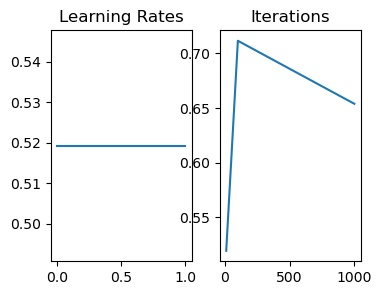

In [34]:
# Put your code here
rates = np.linspace(.001, 1, 1000, endpoint = True)
iters = [10, 100, 1000]
rate_results = []
iters_results = []
for i in rates:
    perc = Perceptron(learning_rate = i, n_iters = 10)
    perc.fit(X, train_labels)
    pred = perc.predict(X_test)
    rate_results.append(accuracy(pred, test_labels))
for i in iters:
    perc = Perceptron(learning_rate = 0.1, n_iters = i)
    perc.fit(X, train_labels)
    pred = perc.predict(X_test)
    iters_results.append(accuracy(pred, test_labels))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (4, 3))
ax1.plot(rates, rate_results)
ax1.set_title('Learning Rates')
ax2.plot(iters, iters_results)
ax2.set_title('Iterations')


**&#9989; Question 7.2 (1 point):** If you explore the various accuracies you end up getting for the various combinations of learning rate and number of iterations, you'd probably notice that there are a number of combinations that give you the same accuracy. This suggests that perhaps the Perceptron classifier is not finding a "converged" solution. As a reminder, the Perceptron classifier will only converge if the data is linearly separable. Do you think the sonar dataset is linearly separable? Why or why not? (You can use some of your experience with the SVC model to help you answer this question.)

<font size=+3>&#9998;</font> Erase this and put your answer here.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 7", and push the changes to GitHub.

---

---
## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw04_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up¶
Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mHUMR9xxSH" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!
Submit this assignment by uploading it to the course Desire2Learn web page. Go to the "Homework Assignments" folder, find the submission folder for Homework 4, and upload your notebook.

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University